In [14]:
import pandas as pd
df = pd.read_csv('Min wage.csv',encoding='latin')


In [15]:
df.to_csv('Min wage.csv',encoding='utf-8')

In [16]:
df = pd.read_csv('Min wage.csv')

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1,1968,Alaska,2.1,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [19]:
gb = df.groupby('State')
gb.get_group('Alabama').set_index('Year').head()

,Unnamed: 0,Unnamed: 0.1,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,,
1968,0,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [20]:
act_min_wage = pd.DataFrame()
for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()



,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [21]:
act_min_wage.describe()


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [22]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [23]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1,1968,Alaska,2.1,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [24]:
issue = df[df['Low.2018']==0]
issue.head()

,Unnamed: 0,Unnamed: 0.1,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [25]:
issue['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [26]:
import numpy as np
act_min_wage.replace(0,np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [27]:
minimumwage_corr = act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()
minimumwage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [28]:
for problem in issue['State'].unique():
    if problem in minimumwage_corr.columns:
        print("Missing something here....")


In [29]:
grouped_issues = issue.groupby("State")

grouped_issues.get_group("Alabama").head(3)


,Unnamed: 0,Unnamed: 0.1,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0


In [30]:
grouped_issues.get_group("Alabama")['Low.2018'].sum()


0.0

In [31]:
for state, data in grouped_issues:
    if data['Low.2018'].sum() != 0.0:
        print("Some data found for", state)


In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("Min wage.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


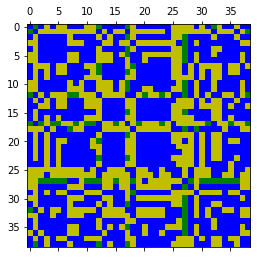

In [36]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap =ListedColormap(['g','y','b'])
plt.matshow(min_wage_corr,cmap=cmap)
plt.show()


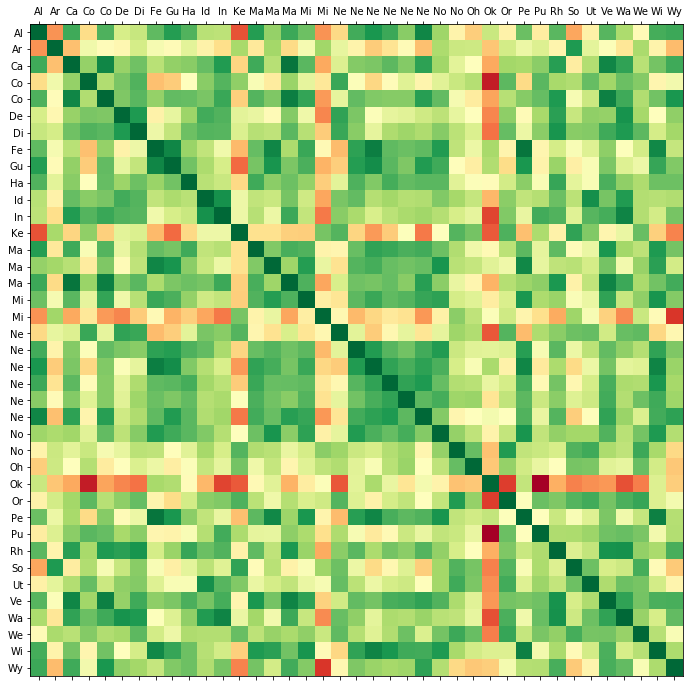

In [37]:
import matplotlib.pyplot as plt

labels = [c[:2] for c in min_wage_corr.columns]  
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)  
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn) 
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))  
ax.set_xticklabels(labels)  
ax.set_yticklabels(labels)  

plt.show()



In [38]:
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)


import pandas as pd



dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

In [39]:
for df in dfs:
    print(df.head())  


  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa            Â          AS
1                Guam         Guam          GU
2    Marshall Islands            Â          MH
3          Micronesia            Â          FM
4   Northern Marianas            Â          MP


In [40]:
state_abbv = dfs[0]

state_abbv.head()


,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [44]:
state_abbv.to_csv("Min wage.csv")


In [45]:
state_abbv = pd.read_csv("Min wage.csv")
state_abbv.head()


,Unnamed: 0,Unnamed: 0.1,State/District,Abbreviation,Postal Code
0,0,0,Alabama,Ala.,AL
1,1,1,Alaska,Alaska,AK
2,2,2,Arizona,Ariz.,AZ
3,3,3,Arkansas,Ark.,AR
4,4,4,California,Calif.,CA


In [43]:
state_abbv[["State", "Postal Code"]].to_csv("Min wage.csv", index=False)  

In [46]:
state_abbv = pd.read_csv("Min wage.csv", index_col=0)
state_abbv.head()


,Unnamed: 0.1,State/District,Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


In [47]:
abbv_dict = state_abbv.to_dict()


In [48]:
abbv_dict

{'Unnamed: 0.1': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50},
 'State/District': {0: 'Alabama',
  1: 'Alaska',
  2: 'Arizona',
  3: 'Arkansas',
  4: 'California',
  5: 'Colorado',
  6: 'Connecticut',
  7: 'Delaware',
  8: 'District of Columbia',
  9: 'Florida',
  10: 'Georgia',
  11: 'Hawaii',
  12: 'Idaho',
  13: 'Illinois',
  14: 'Indiana',
  15: 'Iowa',
  16: 'Kansas',
  17: 'Kentucky',
  18: 'Louisiana',
  19: 'Maine',
  20: 'Maryland',
  21: 'Massachusetts',
  22: 'Michigan',
  23: 'Minnesota',
  24: 'Mississippi',
  25: 'Missouri',
  26: 'Mont

In [49]:
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{0: 'AL',
 1: 'AK',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'DC',
 9: 'FL',
 10: 'GA',
 11: 'HI',
 12: 'ID',
 13: 'IL',
 14: 'IN',
 15: 'IA',
 16: 'KS',
 17: 'KY',
 18: 'LA',
 19: 'ME',
 20: 'MD',
 21: 'MA',
 22: 'MI',
 23: 'MN',
 24: 'MS',
 25: 'MO',
 26: 'MT',
 27: 'NE',
 28: 'NV',
 29: 'NH',
 30: 'NJ',
 31: 'NM',
 32: 'NY',
 33: 'NC',
 34: 'ND',
 35: 'OH',
 36: 'OK',
 37: 'OR',
 38: 'PA',
 39: 'RI',
 40: 'SC',
 41: 'SD',
 42: 'TN',
 43: 'TX',
 44: 'UT',
 45: 'VT',
 46: 'VA',
 47: 'WA',
 48: 'WV',
 49: 'WI',
 50: 'WY'}

In [50]:
abbv_dict['Federal (FLSA)'] = "FLSA"


In [51]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Alaska'

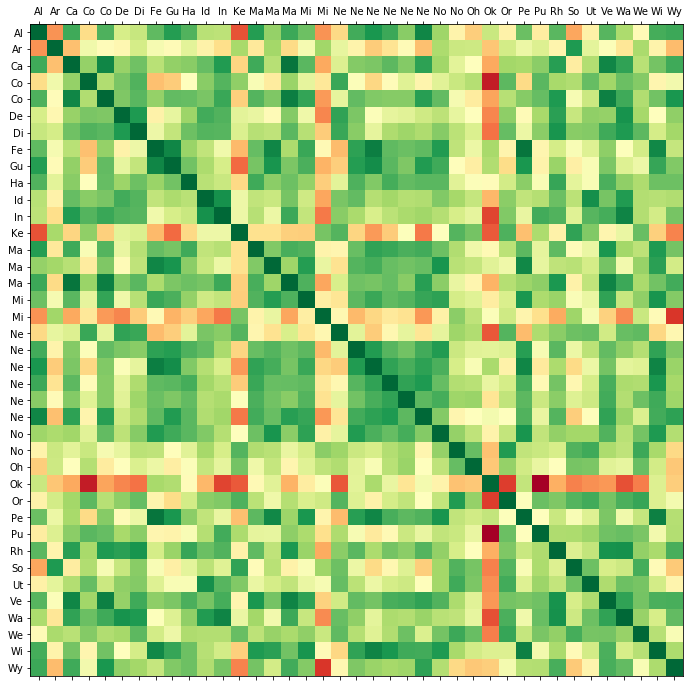

In [52]:
labels = [c[:2] for c in min_wage_corr.columns]  
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)  
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn) 
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))  
ax.set_xticklabels(labels)  
ax.set_yticklabels(labels)  

plt.show()

